In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from typing import List, Tuple
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# 🧠 Visualizing the Elnamaki Topological Network in 3D

This notebook constructs a **3D recursive lattice** of Elnamaki sequences using seed pairs as structural origins 
It visualizes how recursive arithmetic trajectories evolve across space, depth, and identity.

---

### 📐 What is Being Constructed?

We generate a set of **Fibonacci-style sequences**:
- Each starts with a unique **seed pair** $(x, y)$
- Each sequence evolves recursively as:
  
  $$
  S_0 = x, \quad S_1 = y, \quad S_n = S_{n-1} + S_{n-2}
  $$

We select **non-overlapping subsequences** to ensure uniqueness and structural independence of each layer.


In [2]:
def generate_elnamaki_seeds(num_seeds: int) -> List[Tuple[int, int]]:
    seeds = []
    b = 1
    while len(seeds) < num_seeds:
        for a in range(b):
            if len(seeds) >= num_seeds:
                break
            seeds.append((a, b))
        b += 1
    return seeds

def evolve_seed_pair(seed: Tuple[int, int], length: int) -> List[int]:
    a, b = seed
    seq = [a, b]
    while len(seq) < length:
        seq.append(seq[-1] + seq[-2])
    return seq

def is_subsequence(seed: Tuple[int, int], seq: List[int]) -> bool:
    for i in range(len(seq) - 1):
        if seq[i] == seed[0] and seq[i+1] == seed[1]:
            return True
    return False

def evolve_unique_elnamaki_sequences(num_seeds: int, sequence_length: int) -> List[List[int]]:
    seeds = generate_elnamaki_seeds(num_seeds * 2)
    accepted = []
    for seed in seeds:
        if any(is_subsequence(seed, s) for s in accepted):
            continue
        accepted.append(evolve_seed_pair(seed, sequence_length))
        if len(accepted) >= num_seeds:
            break
    return accepted


### 🧬 What Does the Graph Represent?

- Each **node** is a unique integer from one of the evolved sequences.
- Each **edge** connects two successive terms in the sequence:  
  $$
  (S_n, S_{n+1})
  $$
- Each sequence is assigned a unique **color**, representing a distinct path in the Elnamaki lattice.
- The 3D position of each node encodes:
  - **x-axis**: step index $n$
  - **y-axis**: sequence/layer index
  - **z-axis**: the numeric value $S_n$

---

### 🌌 Interpretation in Elnamaki Coding

This 3D graph is a **topological embedding** of symbolic arithmetic identities:
- Each sequence is a **recursive path** in $\mathbb{Z}^3$
- Each layer is a **semantic trajectory**, defined by a different generative seed
- This lattice embodies the **Elnamaki Tensor Web**, where identities emerge through recursive structural propagation

---

### 🔍 Graph Details Output

At the end, we print:
- All **nodes**: scalar values appearing in the network
- All **edges**: recursive transitions
- All **layers**: the sequences as structural pathways

This gives students direct access to the symbolic structure of arithmetic in the Elnamaki paradigm — not as numbers, but as topological entities.

In [3]:
# === Graph 3D Construction ===
def build_connected_elnamaki_graph_3d(sequences: List[List[int]]) -> Tuple[nx.Graph, dict, List[str], List[str]]:
    G = nx.Graph()
    color_map = cm.get_cmap("tab20", len(sequences))
    pos_3d = {}
    node_seen = set()
    node_colors = []
    edge_colors = []

    x_spacing = 2.0
    y_spacing = 3.0
    z_scale = 1.0

    for idx, seq in enumerate(sequences):
        color = mcolors.to_hex(color_map(idx))
        for i, val in enumerate(seq):
            if val not in node_seen:
                node_seen.add(val)
                x = i * x_spacing
                y = idx * y_spacing
                z = val * z_scale
                pos_3d[val] = (x, y, z)
                node_colors.append(color)
        for i in range(len(seq) - 1):
            G.add_edge(seq[i], seq[i + 1])
            edge_colors.append(color)

    return G, pos_3d, node_colors, edge_colors

# === 3D Plot ===
def plot_connected_elnamaki_graph_3d(G: nx.Graph, pos_3d: dict, node_colors: List[str], edge_colors: List[str]):
    fig = plt.figure(figsize=(18, 12))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("🜏 3D Connected Elnamaki Topological Network", fontsize=14)

    # Plot edges
    for idx, (u, v) in enumerate(G.edges()):
        x = [pos_3d[u][0], pos_3d[v][0]]
        y = [pos_3d[u][1], pos_3d[v][1]]
        z = [pos_3d[u][2], pos_3d[v][2]]
        ax.plot(x, y, z, color=edge_colors[idx], linewidth=2, alpha=0.9)

    # Plot nodes
    xs = [pos_3d[n][0] for n in G.nodes()]
    ys = [pos_3d[n][1] for n in G.nodes()]
    zs = [pos_3d[n][2] for n in G.nodes()]
    node_color_map = [node_colors[i] for i in range(len(G.nodes()))]

    ax.scatter(xs, ys, zs, c=node_color_map, s=100, edgecolors='k', depthshade=True)

    # Label nodes
    for n in G.nodes():
        x, y, z = pos_3d[n]
        ax.text(x, y, z + 2, str(n), fontsize=8, ha='center', va='bottom')

    ax.set_axis_off()
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_27385/651709612.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap("tab20", len(sequences))
/tmp/ipykernel_27385/651709612.py:57: UserWarning: Glyph 128783 (\N{ALCHEMICAL SYMBOL FOR BLACK SULFUR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/x01/Desktop/ENN/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128783 (\N{ALCHEMICAL SYMBOL FOR BLACK SULFUR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


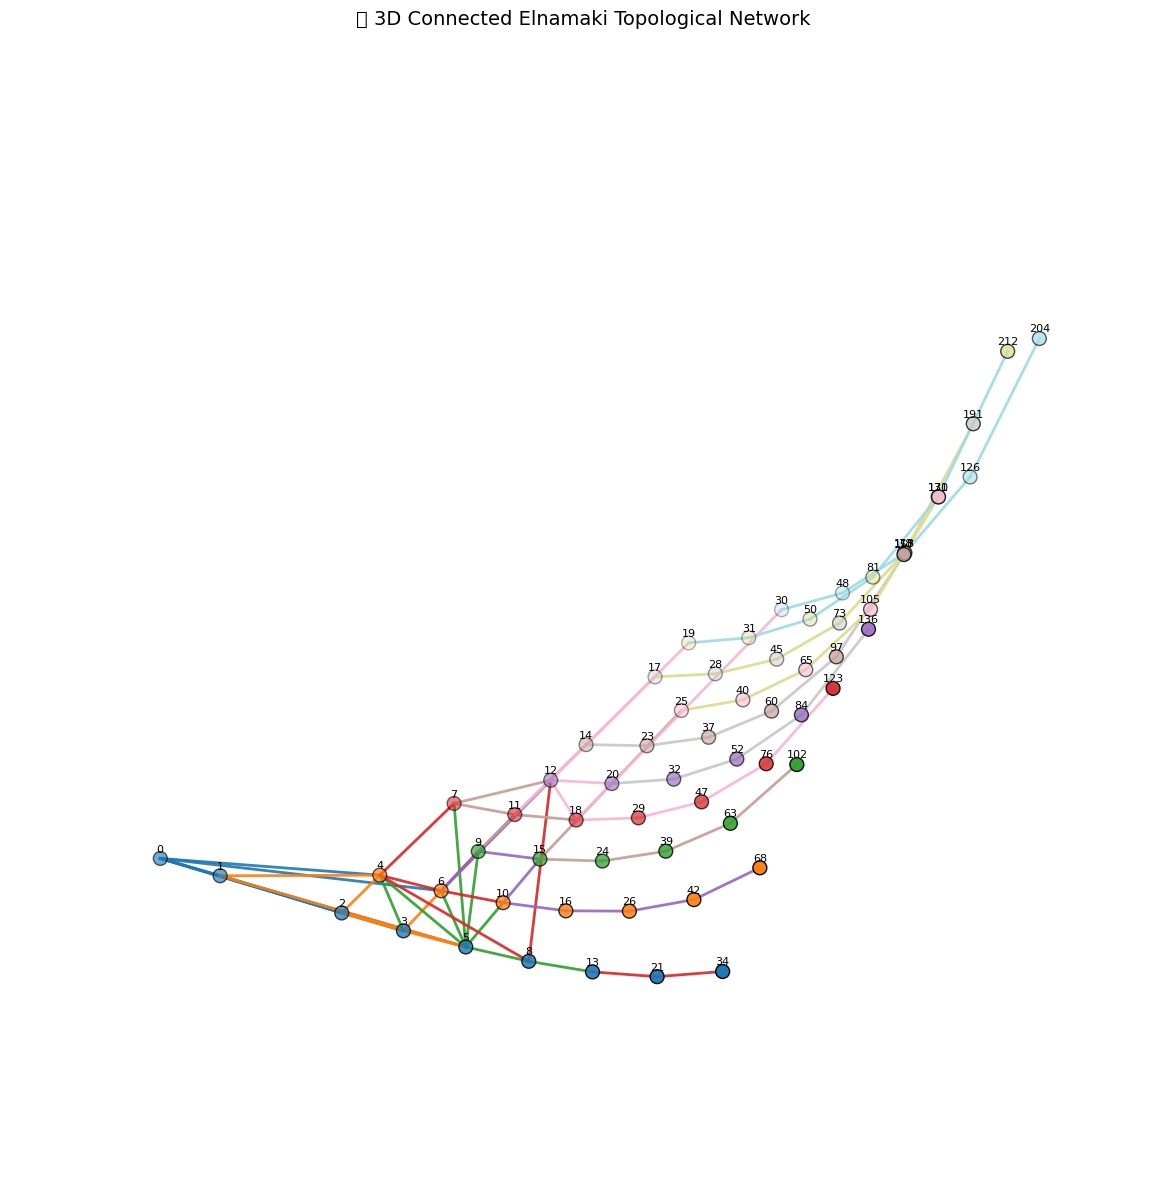

📦 Nodes in Elnamaki Graph: [0, 1, 2, 3, 5, 8, 13, 21, 34, 4, 6, 10, 16, 26, 42, 68, 9, 15, 24, 39, 63, 102, 7, 11, 18, 29, 47, 76, 123, 12, 20, 32, 52, 84, 136, 14, 23, 37, 60, 97, 157, 25, 40, 65, 105, 170, 17, 28, 45, 73, 118, 191, 19, 31, 50, 81, 131, 212, 30, 48, 78, 126, 204] with length 63
🔗 Edges in Elnamaki Graph: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 2), (2, 4), (2, 5), (3, 5), (3, 3), (3, 6), (3, 4), (5, 8), (5, 4), (5, 9), (5, 5), (5, 10), (5, 6), (5, 7), (8, 13), (8, 4), (8, 12), (13, 21), (21, 34), (4, 6), (4, 7), (4, 4), (6, 10), (6, 9), (6, 11), (6, 6), (6, 12), (10, 16), (10, 15), (16, 26), (26, 42), (42, 68), (9, 15), (9, 14), (15, 24), (15, 25), (24, 39), (39, 63), (63, 102), (7, 11), (7, 12), (11, 18), (11, 17), (18, 29), (18, 12), (18, 30), (29, 47), (47, 76), (76, 123), (12, 20), (12, 19), (20, 32), (32, 52), (52, 84), (84, 136), (14, 23), (23, 37), (37, 60), (60, 97), (97, 157), (25, 40), (40, 65), (65

In [4]:
num_seeds = 10
sequence_length = 10
sequences = evolve_unique_elnamaki_sequences(num_seeds, sequence_length)
G, pos_3d, node_colors, edge_colors = build_connected_elnamaki_graph_3d(sequences)
plot_connected_elnamaki_graph_3d(G, pos_3d, node_colors, edge_colors)

# === Output Graph Details ===
list_of_nodes = list(G.nodes())
list_of_edges = list(G.edges())
print("📦 Nodes in Elnamaki Graph:", list_of_nodes, "with length", len(list_of_nodes) )
print("🔗 Edges in Elnamaki Graph:", list_of_edges, "with length", len(list_of_edges))
print("Layers:", sequences, "number of layers", len(sequences))


## 🧠 Elnamaki Graph as a Symbolic Neural Network

The structure we've constructed can be interpreted as a **neural network**, but not in the traditional sense of fully connected perceptrons.

Instead, this is a **recursive, layered network**, where:

- Each **node** is a **structural neuron**, representing a semantic number identity.
- Each **edge** encodes a **recursive connection**, representing an additive transformation (like $a + b = c$).
- Each **layer** corresponds to a unique **sequence path**, generated from a distinct seed $(x, y)$.

---

### 🧬 How This Relates to Neural Networks

| Concept | Elnamaki Graph | Classical Neural Network |
|--------|----------------|---------------------------|
| Neurons | Recursive numbers (nodes) | Units with activations |
| Weights | Structural transitions (edges) | Learned weights |
| Layers | Recursive seeds (sequences) | Dense / conv layers |
| Activation | Symbolic emergence | Sigmoid/ReLU |
| Input | Seed pair $(x, y)$ | Vector $x$ |
| Output | Topological identity path | Output neuron activations |

---

### 🔁 Topological Recursion as Computation

Each layer evolves recursively using:

$$
S_n = S_{n-1} + S_{n-2}
$$

And from each seed, a new **symbolic pathway** is built — structurally distinct, topologically connected.

Instead of **backpropagation**, the system learns through **structural redundancy** and **path expansion**, forming what we call the **Elnamaki Tensor Web**.

---

### 🧠 Why This Is Powerful

- Recursive structure = **memory**
- Topological layers = **semantic depth**
- Symbolic nodes = **emergent meaning**

This network is suitable for:
- Symbolic AI
- Arithmetic cognition
- Recursive language modeling
- Neural arithmetic logic units (NALUs)
- Post-symbolic AGI research

---

📦 **Total Nodes**: 63  
🔗 **Total Edges**: 90  
🧱 **Recursive Layers (Paths)**: 10

Each layer is a **dimension of recursive emergence**, and together they form a **multi-layer symbolic system**, capable of abstract reasoning and path-based inference.

